To analyze the collected postprandial glucose and insulin data simultaneously, we propose to use a computational modeling approach and hypothesize that it is more robust in describing postprandial dynamics than currently used AUC-based methods. 

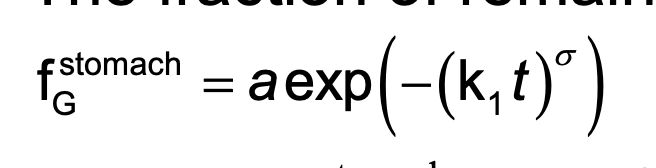

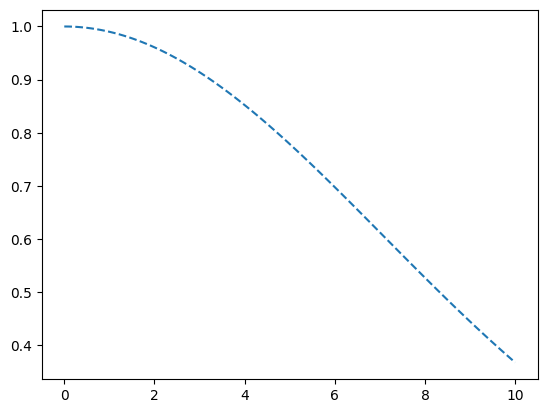

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f_G(a, k1, sigma, t):
    return a * np.exp(-(k1*t)**sigma)

t = np.linspace(0,10,100)
a = 1
k1 = 0.1
sigma = 2

y = f_G(a, k1, sigma, t)
plt.plot(t,y, '--')


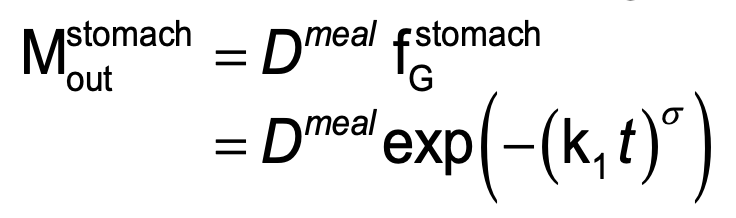

In [6]:
def M_out(D_meal,k1, sigma, t):
    return D_meal * np.exp(-(k1*t)**sigma)
   

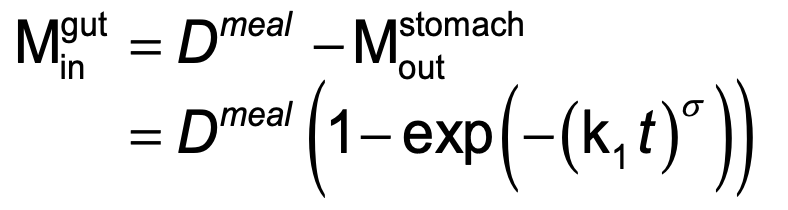

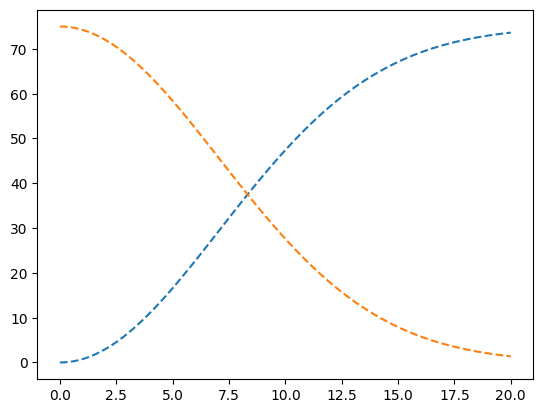

In [10]:
def M_in(D_meal,k1, sigma, t):
    return D_meal * (1 - np.exp(-(k1*t)**sigma))

t = np.linspace(0,20,100)
a = 1
k1 = 0.1
sigma = 2
D_meal = 75

y = M_in(D_meal, k1, sigma, t)
y2 = M_out(D_meal, k1, sigma, t)

plt.plot(t,y, '--')
plt.plot(t,y2, '--')

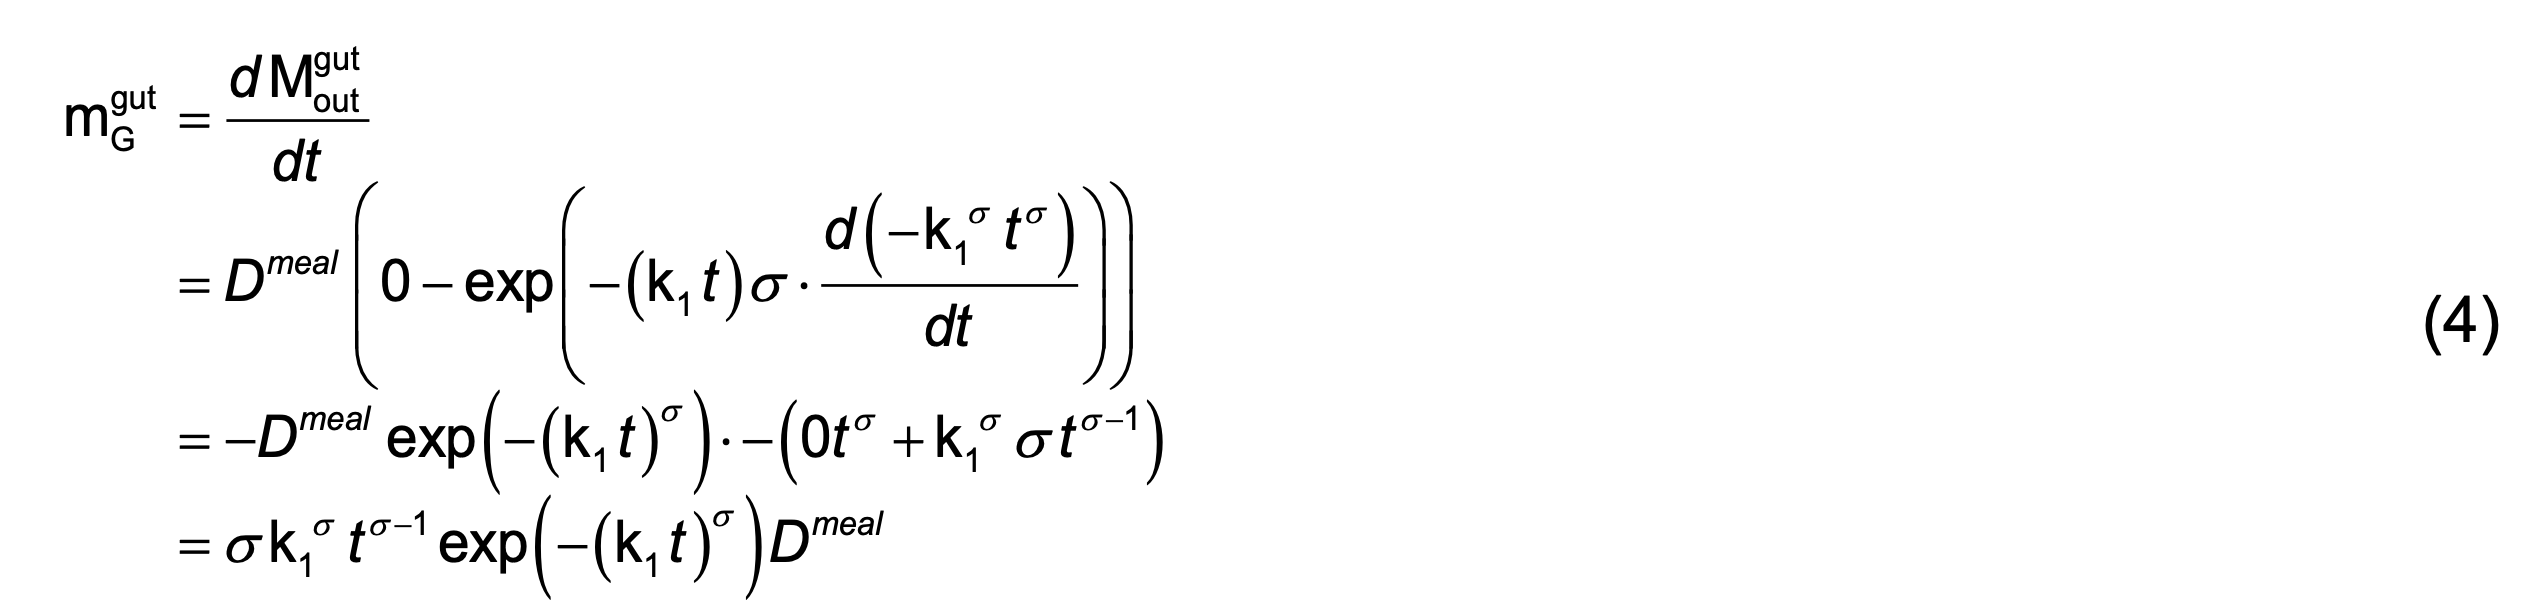

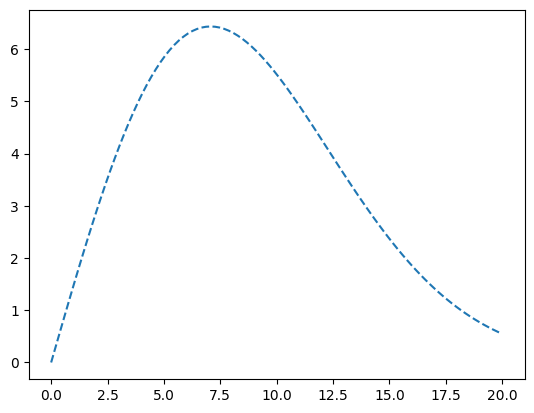

In [12]:
def m_G(D_meal,k1, sigma, t):
    return sigma * k1**sigma * t**(sigma-1) * D_meal * np.exp(-(k1*t)**sigma)

t = np.linspace(0,20,100)
a = 1
k1 = 0.1
sigma = 2
D_meal = 75

y = m_G(D_meal, k1, sigma, t)

plt.plot(t,y, '--')

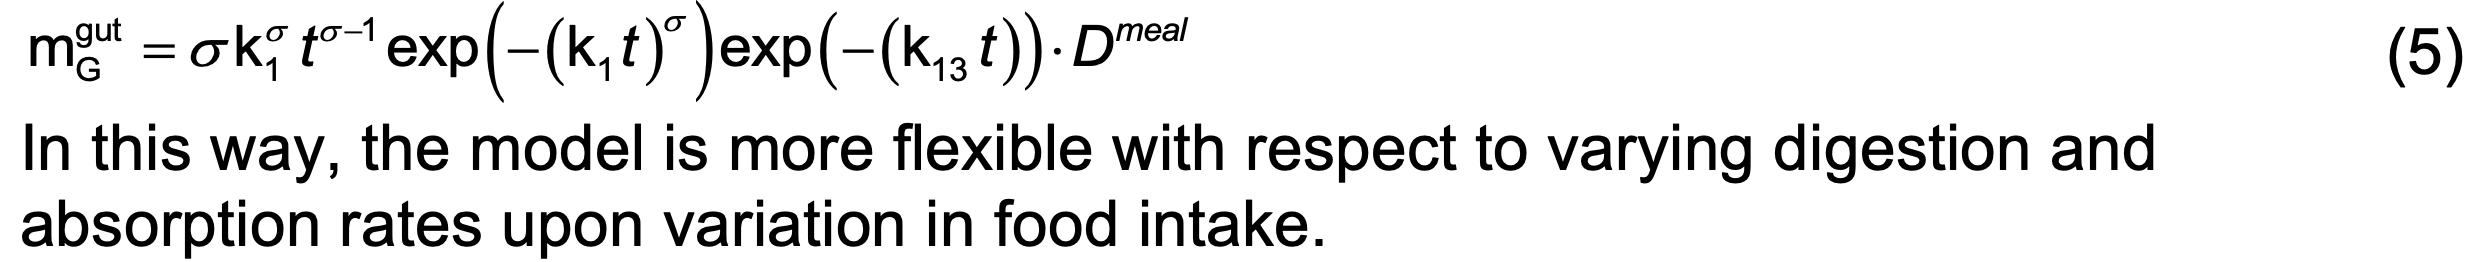

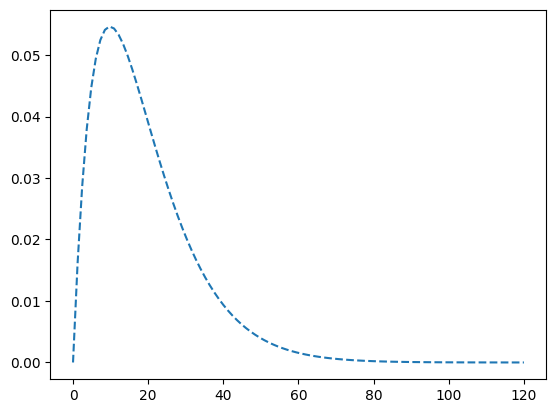

In [18]:
def m_G(D_meal,k1,k13, sigma, t):
    return sigma * k1**sigma * t**(sigma-1) * D_meal * np.exp(-(k1*t)**sigma)*np.exp(-(k13*t))

t = np.linspace(0,120,100)
a = 1
k1 = 0.01
k13 = 0.1
sigma = 2
D_meal = 75

y = m_G(D_meal, k1, k13, sigma, t)

plt.plot(t,y, '--')

Only the model parameters related to food digestion and subsequent glucose absorption are allowed to change during the recalibration of the model.

In [21]:
#Definition of all parameters used in this study, four a fitable it seems?
k1 = 1.45e-2 #taken from original study, here fitable 
k2 = 2.76e-1 #taken from original study, here fitable 
k3 = 6.07e-3
k4 = 2.35e-4
k5 = 9.49e-2
k6 = 1.93e-1
k7 = 1.15
k8 = 7.27
k9 = 0
k10 = 0
k11 = 3.83e-2
k12 = 2.84e-1
k13 = 0 #fitable - new parameter!
sigma = 1.34 #taken from original study, here fitable 
K_M = 13.2 #very different from orginial study, there 2.36e2




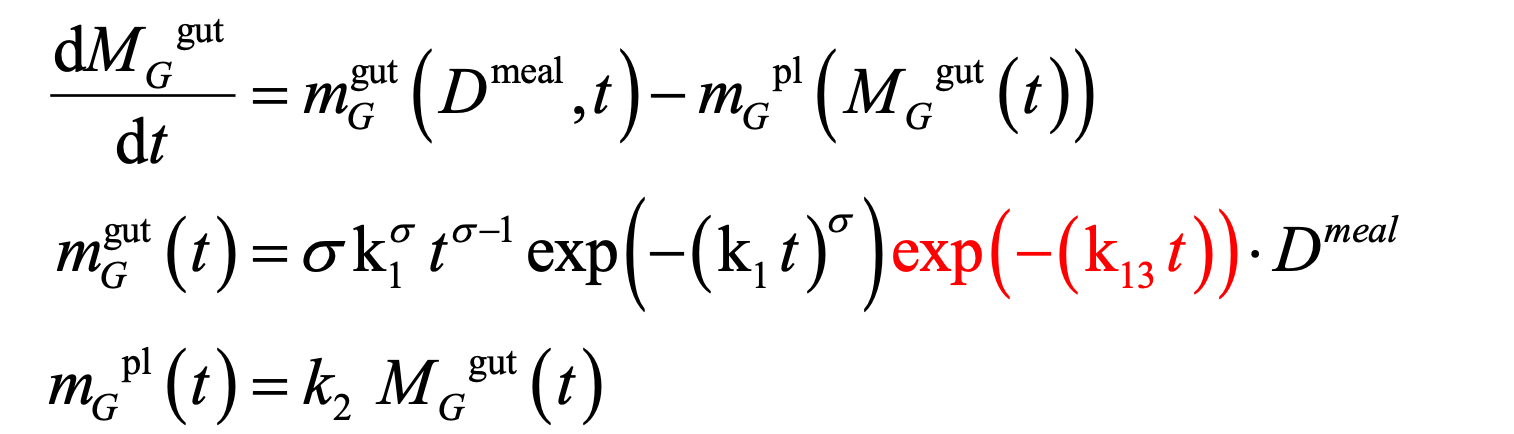

In [20]:
#Getting all the relevant equations put together

def M_G_gut(D_meal,k1, sigma, t):
    return D_meal * np.exp(-(k1*t)**sigma)

def m_G_gut(D_meal,k1,k13, sigma, t):
    return sigma * k1**sigma * t**(sigma-1) * D_meal * np.exp(-(k1*t)**sigma)*np.exp(-(k13*t))

def m_G_pl(k2, D_meal,k1, sigma, t):
    return k2 * D_meal * np.exp(-(k1*t)**sigma)


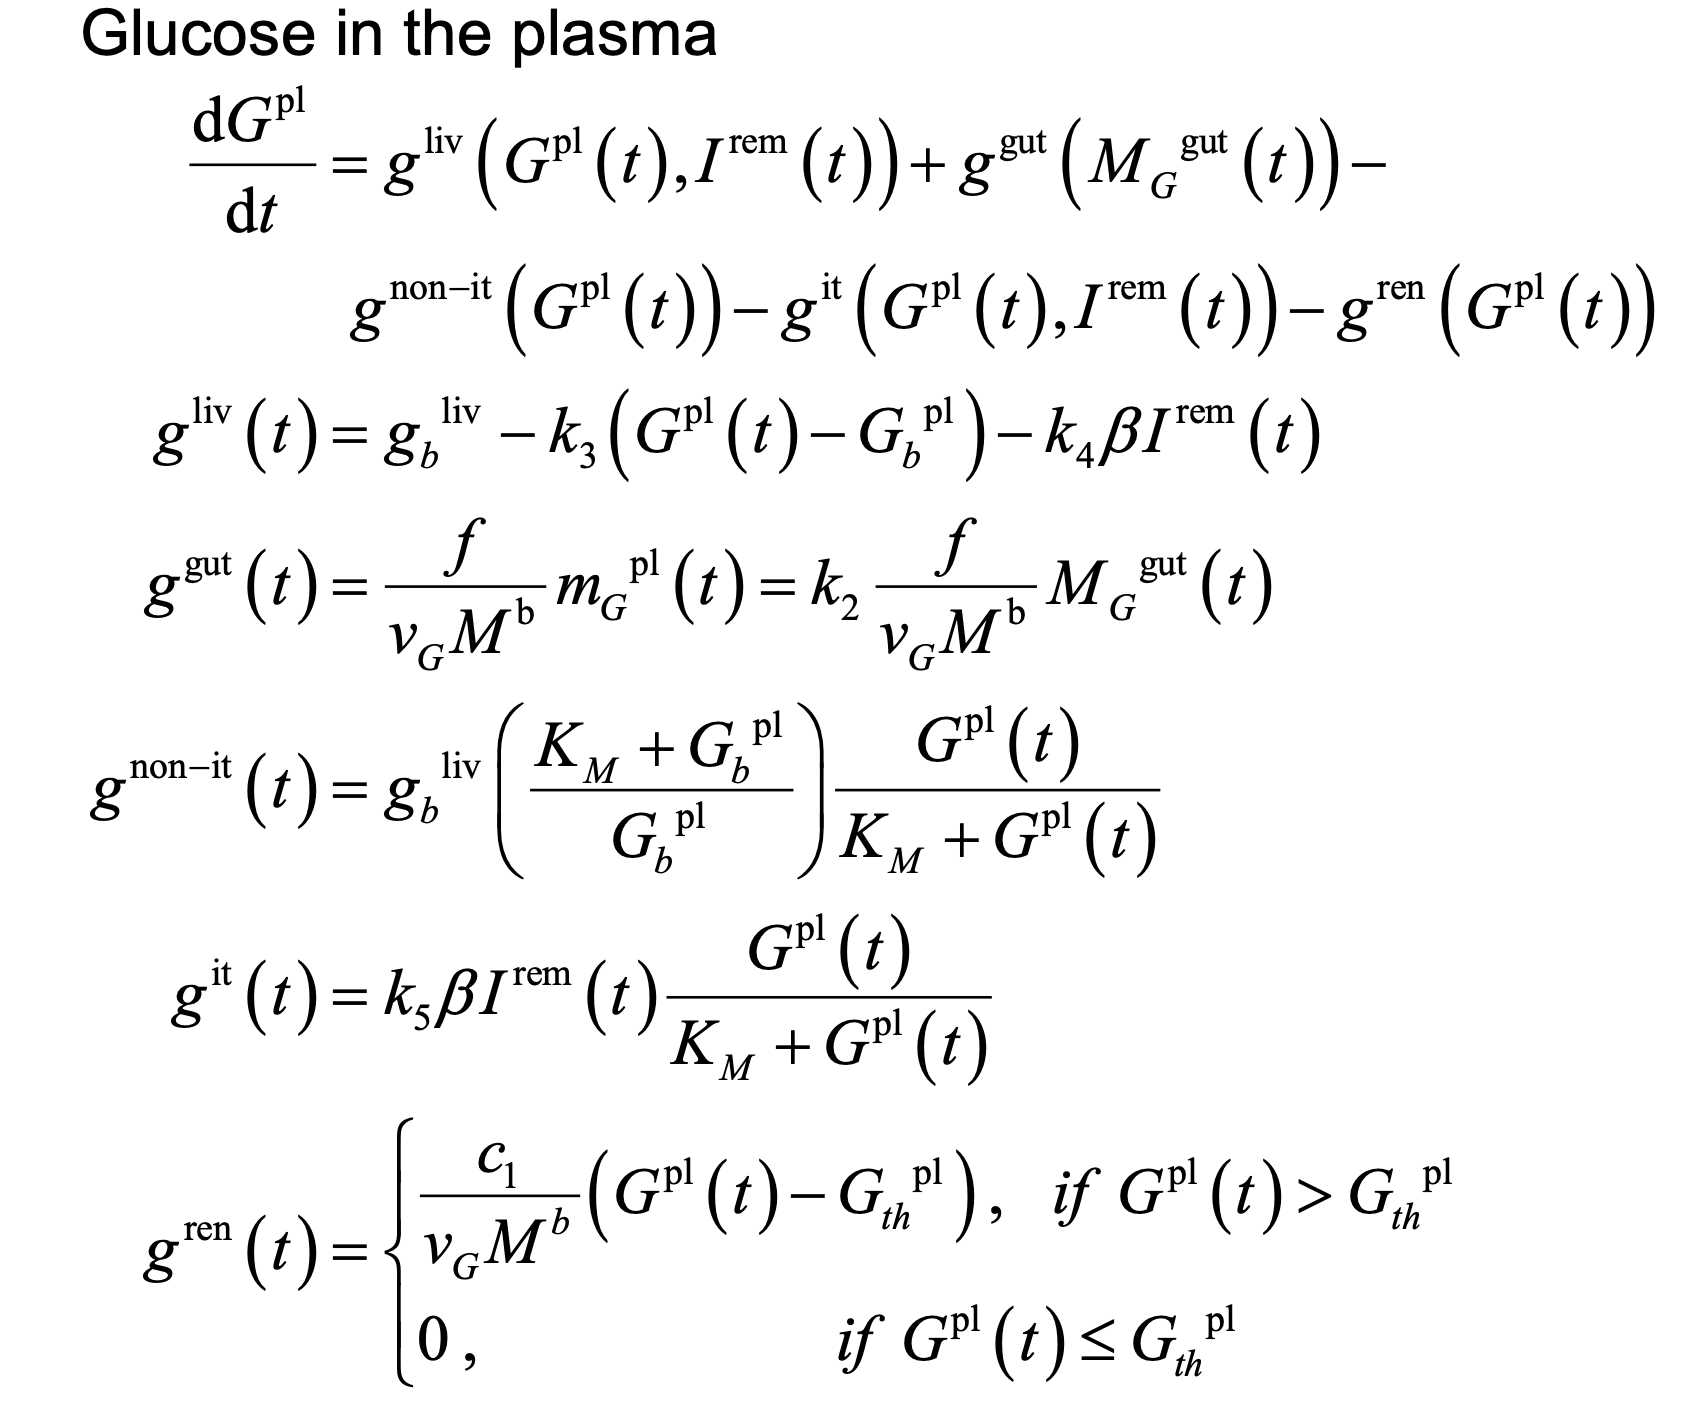

In [ ]:
#this requires extra constants from https://journals.sagepub.com/doi/10.1177/1932296814562607

#the model consists of two coupled Differential Equations for Glucose and Insulin in the plasma. 
#given the parameters, one needs to solve the system of equations using a solver. 
# 

def G_pl(t):
    return 1 #TODO: Needs to be fixed!
def I_pl(t):
    return 1 #TODO: Needs to be fixed!
G_b_pl = G_pl(0)
I_b_pl = I_pl(0)
g_b_liv = 0.043
G_th_pl = 9
v_G = 17/70
v_i = 13/70
beta = 1
f = 0.005551
tau_i = 31
t_int = 30
tau_d = 3
c1 = 0.1


def g_liv(t):
    return g_b_liv - k3 * (G_pl(t))

#The missing paramaters for each food can be found in appendix https://ars.els-cdn.com/content/image/1-s2.0-S2352939317300374-mmc2.xlsx

#It seems clear that many studies are missing here? Where are the correspondingly fitted params?

Text(0.5, 0.92, 'solve_ivp')

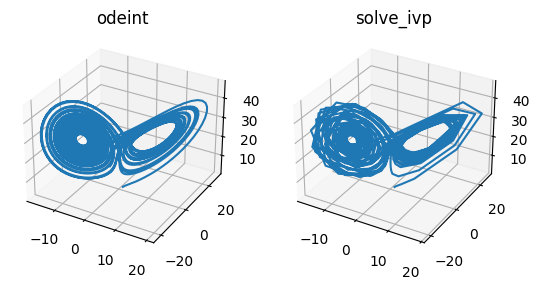

In [30]:
import scipy

#matlab ode15s can be solved with scipy equivalent

#here is a great tutorial on how to solve the ODEs: https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/

#example of how it can be integrated!
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [1.0, 1.0, 1.0]  # Initial state of the system

t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)
 
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p)
 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
ax.set_title("odeint")
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")

In [33]:
#What is next?

#1. Code up the full equations from papers: https://journals.sagepub.com/doi/10.1177/1932296814562607, https://www.sciencedirect.com/science/article/pii/S2352939317300374

#2. Use the ODE solver to get the glycemic response curves for the meals that have k1,k13, etc listed here: https://ars.els-cdn.com/content/image/1-s2.0-S2352939317300374-mmc2.xlsx

#3. Plot these curves and add the measured points from the studies: https://ars.els-cdn.com/content/image/1-s2.0-S2352939317300374-mmc1.xlsx

#4. Calcualte the difference between these curves and the experimental points, this should be similar to what the paper predicted

#5. Use the simple formula that we have to fit a simpler model. It might require also using the data from the [28] study to fully verify


